In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
students_df = pd.read_excel('students/students_groups.xlsx')
pca = PCA(n_components=2)
kmeans_model = KMeans(n_clusters=4, random_state=0)

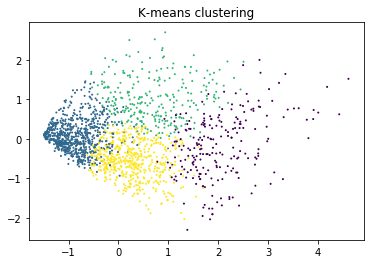

<Figure size 432x288 with 0 Axes>

In [2]:
plt.close()
X = students_df.iloc[:, 10:]
transf = pd.DataFrame(pca.fit_transform(X))
kmeans = kmeans_model.fit(X)
plt.scatter(transf[0], transf[1], c=kmeans.labels_, s=1)
plt.title('K-means clustering')
plt.show()
plt.savefig('students/clustering_fig_250.png')

In [3]:
students_df.shape

(1915, 111)

In [5]:
pca = PCA(n_components=2)
kmeans = KMeans(n_clusters=4, random_state=0)

def get_transofmation(shift):
    global pca
    X = students_df.iloc[:, 10 + shift:]
    
    return pd.DataFrame(pca.fit_transform(X))

def get_kmeans(shift):
    global kmeans
    X = students_df.iloc[:, 10 + shift:]
    return kmeans.fit(X)

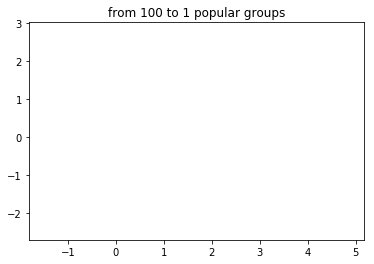

In [6]:
from matplotlib import pyplot as plt
from celluloid import Camera

fig = plt.figure()
camera = Camera(fig)

for shift in range(100):
    transf = get_transofmation(shift)
    plt.scatter(transf.iloc[:, 0].tolist(), transf.iloc[:, 1].tolist(), s=1, c=get_kmeans(shift).labels_)
    plt.title('from {0} to {1} popular groups'.format(100, 100 - shift))
    camera.snap()

animation = camera.animate()
animation.save('students/celluloid_cluster250.gif', writer = 'pillow')